In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.nn.utils.rnn import pad_sequence
from torch.nn.functional import pad
from transformers import AutoModelForTokenClassification, LayoutXLMTokenizerFast, LayoutLMv2FeatureExtractor

import requests
import base64
import io
from PIL import Image
from collections import defaultdict

import pytesseract
import cv2

from sklearn.cluster import KMeans
from torchvision import transforms

In [1]:

torch.cuda.is_available()

False

In [1]:
# !pip install seqeval
# !pip install transformers
# !pip install accelerate -U
# !pip install datasets
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
# !pip install sentencepiece
# !sudo apt-get install tesseract-ocr-rus
# !pip install -q pytesseract
# !tesseract --list-langs

     ---------------------------------------- 0.0/43.6 kB ? eta -:--:--
     -------------------------- ----------- 30.7/43.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 43.6/43.6 kB 538.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/15.8 MB 2.3 MB/s eta 0:00:07
      --------------------------------------- 0.2/15.8 MB 3.0 MB/s eta 0:00:06
      --------------------------------------- 0.3/15.8 MB 3.0 MB/s eta 0:00:06
     - -------------------------------------- 0.6/15.8 MB 3.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/15.8 MB 3.9 MB/s eta 0:00:04
     -- ------------------------------------- 1.1/15.8 MB 4.7 MB/s eta 0:00:04
     ---- ----------------------------------- 1.8/15.8 MB 5.9 MB/s eta 0:00:03
     ------ -----------------------------

  DEPRECATION: seqeval is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
      --------------------------------------- 0.1/8.3 MB 1.6 MB/s eta 0:00:06
     - -------------------------------------- 0.3/8.3 MB 2.0 MB/s eta 0:00:05
     - -------------------------------------- 0.4/8.3 MB 2.3 MB/s eta 0:00:04
     --- ------------------------------------ 0.7/8.3 MB 3.0 MB/s eta 0:00:03
     ---- ----------------------------------- 1.0/8.3 MB 3.5 MB/s eta 0:00:03
     ------ --------------------------------- 1.3/8.3 MB 4.1 MB/s eta 0:00:02
     -------- ------------------------------- 1.7/8.3 MB 4.9 MB/s eta 0:00:02
     ----------- ---------------------------- 2.4/8.3 MB 6.2 MB/s eta 0:00:01
     ------------- -------------------------- 2.7/8.3 MB 6.5 MB/s eta 0:00:01
     -------------------- ------------------- 4.1/8.3 MB 8.3 MB/s eta 0:00:01
     -------------------- ------------------- 4.3/8.3 MB 7.8 MB/s eta 0:00:01



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached datasets-2.15.0-py3-none-any.whl (521 kB)
  Using cached fsspec-2023.10.0-py3-none-any.whl (166 kB)
     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/10.7 MB 3.2 MB/s eta 0:00:04
     ---------------------------------------- 0.1/10.7 MB 1.1 MB/s eta 0:00:11
     --------------------------------------- 0.1/10.7 MB 939.4 kB/s eta 0:00:12
      -------------------------------------- 0.1/10.7 MB 774.0 kB/s eta 0:00:14
      -------------------------------------- 0.1/10.7 MB 774.0 kB/s eta 0:00:14
      -------------------------------------- 0.2/10.7 MB 737.3 kB/s eta 0:00:15
      -------------------------------------- 0.2/10.7 MB 692.4 kB/s eta 0:00:16
      -------------------------------------- 0.2/10.7 MB 627.5 kB/s eta 0:00:17
      -------------------------------------- 0.3/10.7 MB 628.5 kB/s eta 0:00:17
     - ----------------

ERROR: Invalid requirement: "'git+https://github.com/facebookresearch/detectron2.git'"


     ---------------------------------------- 0.0/977.5 kB ? eta -:--:--
     - ------------------------------------- 30.7/977.5 kB 1.3 MB/s eta 0:00:01
     ---- --------------------------------- 112.6/977.5 kB 1.3 MB/s eta 0:00:01
     ------- ------------------------------ 204.8/977.5 kB 1.6 MB/s eta 0:00:01
     ------------- ------------------------ 358.4/977.5 kB 2.0 MB/s eta 0:00:01
     ---------------------- --------------- 573.4/977.5 kB 2.6 MB/s eta 0:00:01
     ------------------------------ ------- 778.2/977.5 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 977.5/977.5 kB 3.3 MB/s eta 0:00:00


"sudo" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"tesseract" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


# Load image

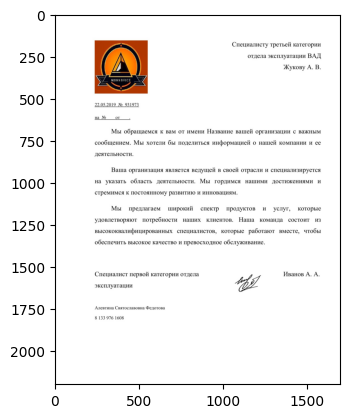

In [6]:
img_filename = 'jpg/1.jpg' # 'jpg/18.jpg' # 'jpg/23.jpg'
img = cv2.cvtColor(cv2.imread(img_filename), cv2.COLOR_BGR2RGB)

plt.imshow(img)

# Encode image

In [7]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

def img2b64(img):
    """Converts image to base64 encoded string
    Args:
        img: numpy.ndarray
    Returns:
        base64 encoded string
    """
    buffer = io.BytesIO()

    if isinstance(img, np.ndarray):
        if len(img.shape) == 2 or img.shape[2] == 1:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

        img = Image.fromarray(img)
    elif isinstance(img, Image.Image):
        pass

    img.save(buffer, 'PNG')
    buffer.seek(0)

    return base64.b64encode(buffer.getvalue()).decode('utf-8')

def retrieve_image(data_or_path, read_as, allowed_extensions=['pdf', 'jpeg', 'png', 'jpg', 'tiff', 'bmp', 'tif']):
    if os.path.exists(data_or_path[:100]):
        with open(data_or_path, 'rb') as f:
            data_or_path = f.read()
    elif isinstance(data_or_path, str):
        try:
            data_or_path = base64.b64decode(data_or_path)
        except Exception:
            return None

    if '.' in read_as:
        read_as = read_as.split('.')[-1].lower()

    if read_as not in allowed_extensions or data_or_path is None:
        return None

    try:
        if read_as == 'pdf':
            images = pdf2np(doc_fn=None, mem_area=data_or_path)
            img = images[0]
        else:
            img_arr = np.frombuffer(data_or_path, np.uint8)
            img = cv2.imdecode(img_arr, cv2.IMREAD_COLOR)
    except Exception as e:
        print(e)
        return None

    coef = 2500 / max(img.shape[:2])
    if coef < 1:
        img = cv2.resize(img, dsize=None, fx=coef, fy=coef, interpolation=cv2.INTER_AREA)

    return img

# with open(img_filename, 'rb') as f:    
#     img_encoded = base64.b64encode(f.read())
img_encoded = img2b64(img)
type(img_encoded)

str

# Decode image

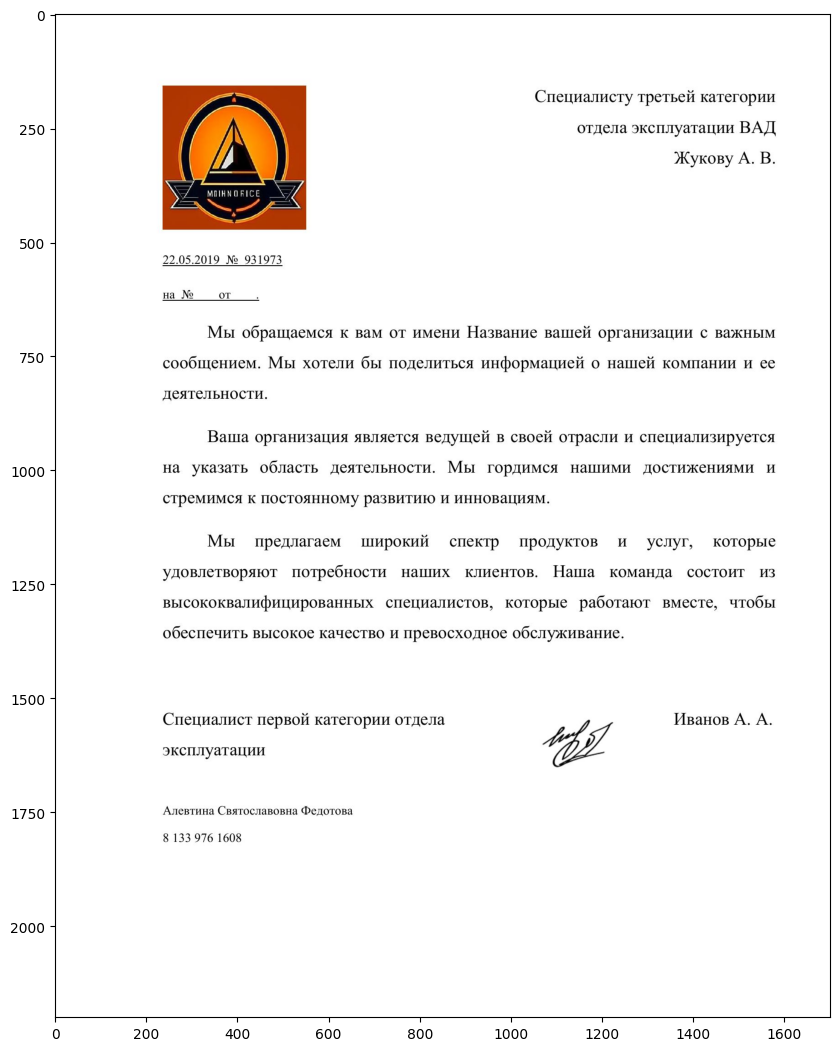

In [8]:
img_decoded = cv2.cvtColor(cv2.imdecode(np.frombuffer(base64.b64decode(img_encoded), dtype=np.uint8), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 20))
plt.imshow(img_decoded)

In [9]:
%%time

response = requests.post('http://localhost:8000/api/doc/get-doc-info', json={'img': img_encoded})
response.json()

CPU times: user 6.35 ms, sys: 680 µs, total: 7.03 ms
Wall time: 20 s


{'senderOrganization': 'МПНМ П ;-СЕ',
 'senderNumber': '931973',
 'senderDate': '22.05.2019',
 'addresseeName': 'Жукову А. В',
 'addresseeJobTitle': 'Специалисту третьей категории отдела эксплуатации',
 'senderName': 'Иванов А А',
 'senderJobTitle': 'Специалист первой категории отдела эксплуатации',
 'executorName': 'Алсвтина Святославовна Федотова',
 'executorPhone': '8 133 976',
 'executorEmail': 'UNK'}

# Load model

In [5]:


# pytesseract.pytesseract.tesseract_cmd = 'C:\Users\mkoltunov\Projects\tesseract_ocr\tesseract.exe'

model = AutoModelForTokenClassification.from_pretrained("./layoutxlm-finetuned-doc")
tokenizer = LayoutXLMTokenizerFast.from_pretrained("./layoutxlm-base")
feature_extractor = LayoutLMv2FeatureExtractor(ocr_lang="rus") # DEPRECATED => LayoutLMv2ImageProcessor

/home/mkoltunov/projects/api_doc/venv/lib/python3.10/site-packages/transformers/models/layoutlmv2/feature_extraction_layoutlmv2.py:30: FutureWarning: The class LayoutLMv2FeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use LayoutLMv2ImageProcessor instead.
  warnings.warn(


# Get predictions

## Tesseract processor

In [45]:
inputs = feature_extractor(img, return_tensors="pt")
encoding = tokenizer(inputs.words, boxes=inputs.boxes, return_offsets_mapping=True,
                 padding="max_length", max_length=512, truncation=True, return_tensors="pt")


device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)

with torch.no_grad():
    outputs = model(input_ids=encoding.input_ids.to(device),
                    attention_mask=encoding.attention_mask.to(device),
                    bbox=encoding.bbox.to(device),
                    image=inputs.pixel_values.to(device),
                   )
predictions = outputs.logits.argmax(-1).squeeze().tolist()
token_boxes = encoding.bbox.squeeze().tolist()

height, width, _ = img.shape

is_subword = np.array(encoding.offset_mapping.squeeze().tolist())[:,0] != 0

true_predictions = [model.config.id2label[pred] for idx, pred in enumerate(predictions) if not is_subword[idx]]
true_boxes = [unnormalize_box(box, width, height) for idx, box in enumerate(token_boxes) if not is_subword[idx]]
words = tokenizer.decode(encoding['input_ids'][0]).split(' ')
# words = words[1:]

len(true_predictions), len(words)

NameError: name 'inputs' is not defined

## EasyOCR processor

In [6]:
from ocr_processor import text_recognition
import easyocr

reader = easyocr.Reader(['ru'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [7]:
def normalize_bbox(bbox, width, height):
    return [
        int(1000 * (bbox[0] / width)),
        int(1000 * (bbox[1] / height)),
        int(1000 * (bbox[2] / width)),
        int(1000 * (bbox[3] / height)),
    ]

height, width, _ = img.shape
inputs_words, inputs_boxes = text_recognition(img, reader)
# inputs_words = np.array(inputs_words)
inputs_boxes = np.array(list(map(normalize_bbox, inputs_boxes, 
                                 [width]*len(inputs_boxes), [height]*len(inputs_boxes))))

encoding = tokenizer(inputs_words, boxes=inputs_boxes, return_offsets_mapping=True, 
                     return_tensors="pt")

# inputs = feature_extractor(img, return_tensors="pt")
# encoding = tokenizer(inputs.words, boxes=inputs.boxes, return_offsets_mapping=True, 
#                      return_tensors="pt")


device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)

input_len = encoding.input_ids.shape[1]
print(input_len)
encoding.input_ids = pad(encoding.input_ids, 
                         pad=(0, 512 - (input_len % 512)), value=1.).reshape(-1, 512)
encoding.attention_mask = pad(encoding.attention_mask, 
                              pad=(0, 512 - (input_len % 512)), value=0.).reshape(-1, 512)
encoding.bbox = pad(encoding.bbox, 
                              pad=(0, 0, 0, 512 - (input_len % 512)), value=0.).reshape(-1, 512, 4)

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((224, 224))])

img_tensor = transform(img)
normalized_image_tensor = torch.unsqueeze(img_tensor, 0)

with torch.no_grad():
    outputs = model(input_ids=encoding.input_ids.to(device),
                    attention_mask=encoding.attention_mask.to(device),
                    bbox=encoding.bbox.to(device),
                    image=normalized_image_tensor.to(device),
                   )
predictions = outputs.logits.argmax(-1).reshape(-1).tolist()
token_boxes = encoding.bbox.reshape(-1, 4).tolist()

height, width, _ = img.shape

is_subword = np.array(encoding.offset_mapping.tolist())[:,:,0].reshape(-1) != 0
print(len(predictions), len(token_boxes), len(is_subword))
true_predictions = [model.config.id2label[pred] for idx, pred in enumerate(predictions[:len(is_subword)]) if not is_subword[idx]]
true_boxes = [tuple(unnormalize_box(box, width, height)) for idx, box in enumerate(token_boxes[:len(is_subword)]) if not is_subword[idx]]
preds_boxes = [(box, pred) for i, (pred, box) in enumerate(zip(true_predictions, true_boxes)) if box not in true_boxes[:i]]
words = tokenizer.decode(encoding['input_ids'][0]).split(' ')
# words = words[1:]

# true_predictions

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
/home/mkoltunov/projects/api_doc/venv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:720: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return torch.tensor(value)
/home/mkoltunov/projects/api_doc/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=Fals

184
512 512 184


In [100]:
words

['<s>',
 'Специалисту',
 'первой',
 'категории',
 'отдела',
 'внедрения',
 'НПО',
 '(Сорокина-Кононов>',
 'Чевыкину',
 'К:',
 'А',
 '04.08.2001',
 ')',
 '372591',
 'На',
 'Л',
 '0Т',
 'Мы',
 'обращаемся',
 'К',
 'вам',
 'ОТ',
 'имени',
 'Название',
 'вашей',
 'организации',
 'важным',
 'сообщением.',
 'Мы',
 'хотели',
 'бы',
 'поделиться',
 'информацией',
 '0',
 'нашей',
 'компании',
 'И',
 'ее',
 'деятельности:',
 'Ваша',
 'организация',
 'является',
 'ведущей',
 'В',
 'своей',
 'отрасли',
 'и',
 'специализируется',
 'на',
 'указать',
 'область',
 'деятельности:',
 'Мы',
 'гордимся',
 'нашими',
 'достижениями',
 'И',
 'стремимся',
 'К',
 'постоянному',
 'развитию',
 'и',
 'инновациям.',
 'Мы',
 'предлагаем',
 'широкий',
 'спектр',
 'продуктов',
 'И',
 'услуг,',
 'которые',
 'удовлетворяют',
 'потребности',
 'наших',
 'клиентов:',
 'Наша',
 'команда',
 'состоит',
 'И3',
 'высококвалифицированных',
 'специалистов;',
 'которые',
 'работают',
 'вместе;',
 'чтобы',
 'обеспечить',
 'высокое

In [94]:
true_predictions

['B-ORG',
 'B-ORG',
 'I-ORG',
 'I-ORG',
 'I-ORG',
 'B-ORG',
 'I-JT',
 'I-ORG',
 'I-JT',
 'I-JT',
 'I-ADR',
 'B-MN',
 'B-MN',
 'B-MN',
 'O',
 'O',
 'O',
 'O',
 'I-ORG',
 'I-JT',
 'I-ORG',
 'I-ORG',
 'B-MN',
 'B-ORG',
 'I-ORG',
 'I-ORG',
 'B-ORG',
 'B-SND',
 'B-ORG',
 'B-ORG',
 'B-ORG',
 'B-SND',
 'O',
 'B-ORG',
 'B-ADR',
 'B-ADR',
 'B-ADR',
 'B-ADR',
 'B-ADR',
 'B-MN',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-ADR',
 'B-ADR',
 'B-ADR',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-ADR',
 'B-ADR',
 'B-ADR',
 'B-ADR',
 'B-MN',
 'O',
 'O',
 'O',
 'B-SND',
 'B-SND',
 'B-SND',
 'I-ADR',
 'I-ADR',
 'B-MN',
 'O',
 'O',
 'I-JT',
 'O',
 'B-JT',
 'I-JT',
 'I-JT',
 'I-JT',
 'B-ORG',
 'B-EXR',
 'I-EXR',
 'I-EXR',
 'B-EXR',
 'I-EXR',
 'I-EXRAAAAAAA',
 'I-ADR',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-EXR',
 'O',
 'O',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT',
 'O',
 'B-JT',
 'B-JT',
 'B-JT',
 'B-JT'

In [95]:
words

['Специалисту',
 'второй',
 'категории',
 'бухгалтерии',
 'ООО',
 '«Юдина',
 'Евдокимов»',
 'Александрову',
 'А.',
 'С.',
 '15.12.2007',
 'No',
 '380377',
 'на',
 'No',
 'от',
 ':',
 'Уважаемый',
 'Александров',
 'А.',
 'С.!',
 'Сообщаем',
 'Вам',
 'о',
 'том,',
 'что',
 '15.07.2023',
 'года',
 'в',
 '10:00',
 'состоится',
 'онлайн-конференция',
 '«Современные',
 'технологии',
 'и',
 'методы',
 'проектирования',
 'в',
 'машиностроении».',
 'Программа',
 'конференции:',
 '1.',
 'Введение',
 'в',
 'тему.',
 '2.',
 'Инновационные',
 'технологии',
 'проектирования',
 'машин.',
 '3.',
 'Применение',
 'современных',
 'САР/САМ',
 'систем',
 'при',
 'проектировании',
 'механических',
 'конструкций.',
 'Для',
 'участия',
 'в',
 'конференции',
 'необходимо',
 'направить',
 'заявку',
 'на',
 'электронную',
 'почту',
 'адрес',
 'до',
 '12.07.2023',
 'года.',
 'Администратор',
 'вычислительной',
 'сети',
 'Абалдуев',
 'О.',
 'Эрнст',
 'Фролович',
 'Артемьев',
 'Бопз1ау1',
 '1',
 '@уапдех.ги']

In [110]:
list(zip(true_predictions[1:], inputs_words))

[('B-JT', 'Специалисту'),
 ('I-JT', 'третьей'),
 ('I-JT', 'категории'),
 ('I-JT', 'отдела'),
 ('I-JT', 'эксплуатации'),
 ('B-ORG', 'ВАД'),
 ('B-ADR', 'Жукову'),
 ('I-ADR', 'А.'),
 ('I-ADR', 'В'),
 ('B-ORG', 'МПНМ П ;-СЕ'),
 ('B-ORG', '22.05.2019'),
 ('B-DR', ')'),
 ('B-MN', '931973'),
 ('B-MN', 'На'),
 ('O', 'Л'),
 ('O', '0Т'),
 ('O', 'Мы'),
 ('O', 'обращаемся'),
 ('O', 'К'),
 ('O', 'вам'),
 ('O', 'ОТ'),
 ('O', 'имени'),
 ('O', 'Название'),
 ('O', 'вашей'),
 ('O', 'организации'),
 ('O', 'важным'),
 ('O', 'сообщением.'),
 ('O', 'Мы'),
 ('O', 'хотели'),
 ('O', 'бы'),
 ('O', 'поделиться'),
 ('O', 'информацией'),
 ('O', '0'),
 ('O', 'нашей'),
 ('O', 'компании'),
 ('O', 'И'),
 ('O', 'ее'),
 ('O', 'деятельности:'),
 ('O', 'Ваша'),
 ('O', 'организация'),
 ('O', 'является'),
 ('O', 'ведущей'),
 ('O', 'В'),
 ('O', 'своей'),
 ('O', 'отрасли'),
 ('O', 'и'),
 ('O', 'специализируется'),
 ('O', 'на'),
 ('O', 'указать'),
 ('O', 'область'),
 ('O', 'деятельности:'),
 ('O', 'Мы'),
 ('O', 'гордимся'),
 (

In [112]:
list(zip(true_boxes[1:], inputs_words))

[([1047.2, 160.6, 1271.6, 206.8], 'Специалисту'),
 ([1271.6, 158.39999999999998, 1411.0, 209.0], 'третьей'),
 ([1411.0, 167.2, 1584.4, 206.8], 'категории'),
 ([1140.7, 237.6, 1259.7, 268.4], 'отдела'),
 ([1259.7, 235.4, 1492.6, 275.0], 'эксплуатации'),
 ([1492.6, 220.0, 1587.8000000000002, 272.8], 'ВАД'),
 ([1351.5, 294.8, 1494.3, 345.4], 'Жукову'),
 ([1499.4, 299.20000000000005, 1533.4, 330.0], 'А.'),
 ([1541.9, 297.0, 1581.0, 334.4], 'В'),
 ([329.8, 378.4, 453.90000000000003, 404.8], 'МПНМ П ;-СЕ'),
 ([329.8, 378.4, 453.90000000000003, 404.8], '22.05.2019'),
 ([232.9, 523.6, 365.5, 554.4], ')'),
 ([374.0, 525.8, 404.59999999999997, 550.0], '931973'),
 ([411.4, 525.8, 501.5, 554.4], 'На'),
 ([234.60000000000002, 605.0, 263.5, 627.0], 'Л'),
 ([273.7, 600.6, 306.0, 624.8], '0Т'),
 ([360.4, 609.4000000000001, 385.90000000000003, 624.8], 'Мы'),
 ([329.8, 675.4, 401.2, 717.2], 'обращаемся'),
 ([404.59999999999997, 677.6, 615.4, 728.2], 'К'),
 ([620.5, 686.4, 646.0, 712.8000000000001], 'вам

In [14]:
list(zip(true_boxes, true_predictions))

[([0.0, 0.0, 0.0, 0.0], 'B-ORG'),
 ([279.526, 177.76399999999998, 545.82, 210.51], 'B-ORG'),
 ([547.474, 175.42499999999998, 704.6039999999999, 212.849], 'I-ORG'),
 ([881.582, 187.12, 1187.572, 240.91699999999997], 'B-JT'),
 ([1187.572, 187.12, 1508.448, 240.91699999999997], 'I-JT'),
 ([173.67, 217.527, 535.8960000000001, 261.968], 'B-JT'),
 ([540.8580000000001, 224.544, 813.768, 259.629], 'I-JT'),
 ([244.792, 271.324, 431.694, 301.731], 'B-ORG'),
 ([441.61800000000005, 271.324, 466.42799999999994, 301.731], 'I-ORG'),
 ([474.698, 268.985, 740.992, 304.07], 'I-ORG'),
 ([375.458, 315.76500000000004, 607.018, 353.18899999999996], 'I-ORG'),
 ([1063.522, 292.375, 1324.854, 341.49399999999997], 'B-JT'),
 ([198.48, 383.596, 461.46600000000007, 418.681], 'B-ORG'),
 ([461.46600000000007, 392.952, 484.62199999999996, 411.664], 'B-ORG'),
 ([487.92999999999995, 385.935, 539.2040000000001, 411.664], 'I-ORG'),
 ([542.5120000000001, 390.613, 590.478, 414.003], 'I-ORG'),
 ([590.478, 390.613, 608.672, 

In [88]:
words[-1] = words[-1].replace('<pad>', '').replace('</s>', '')

In [8]:
preds = true_predictions[:len(words)]
ners = []
ners_dict = defaultdict(list)
entity = []
for word, (box, tag) in zip(inputs_words, preds_boxes[1:]):
    if tag[:2] == 'B-':
        if len(entity) > 0:
            only_ent = [ent for ent in entity if ent[1] != 'O']
            ners.append(only_ent)
            ners_dict[only_ent[0][1][2:]].append(' '.join([e[0] for e in only_ent]))
            entity = []
    entity.append((word, tag))
if len(entity) > 0:
    only_ent = [ent for ent in entity if ent[1] != 'O']
    ners.append(only_ent)
    ners_dict[only_ent[0][1][2:]].append(' '.join([e[0] for e in only_ent]))
ners_dict

defaultdict(list,
            {'JT': ['Специалисту первой категории отдела разработки систем',
              'Руководитель отдела проектирования'],
             'ORG': ['Гала-Форм', '~а 1ф 43(уап-ех гч'],
             'ADR': ['Никишину С: Е:', 'Никишин С: Е: !'],
             'DR': ['19.07.2003'],
             'MN': [')', '534404'],
             'SND': ['Шихов Р. П:'],
             'EXR': ['Василиса Никифоровна Псстова']})

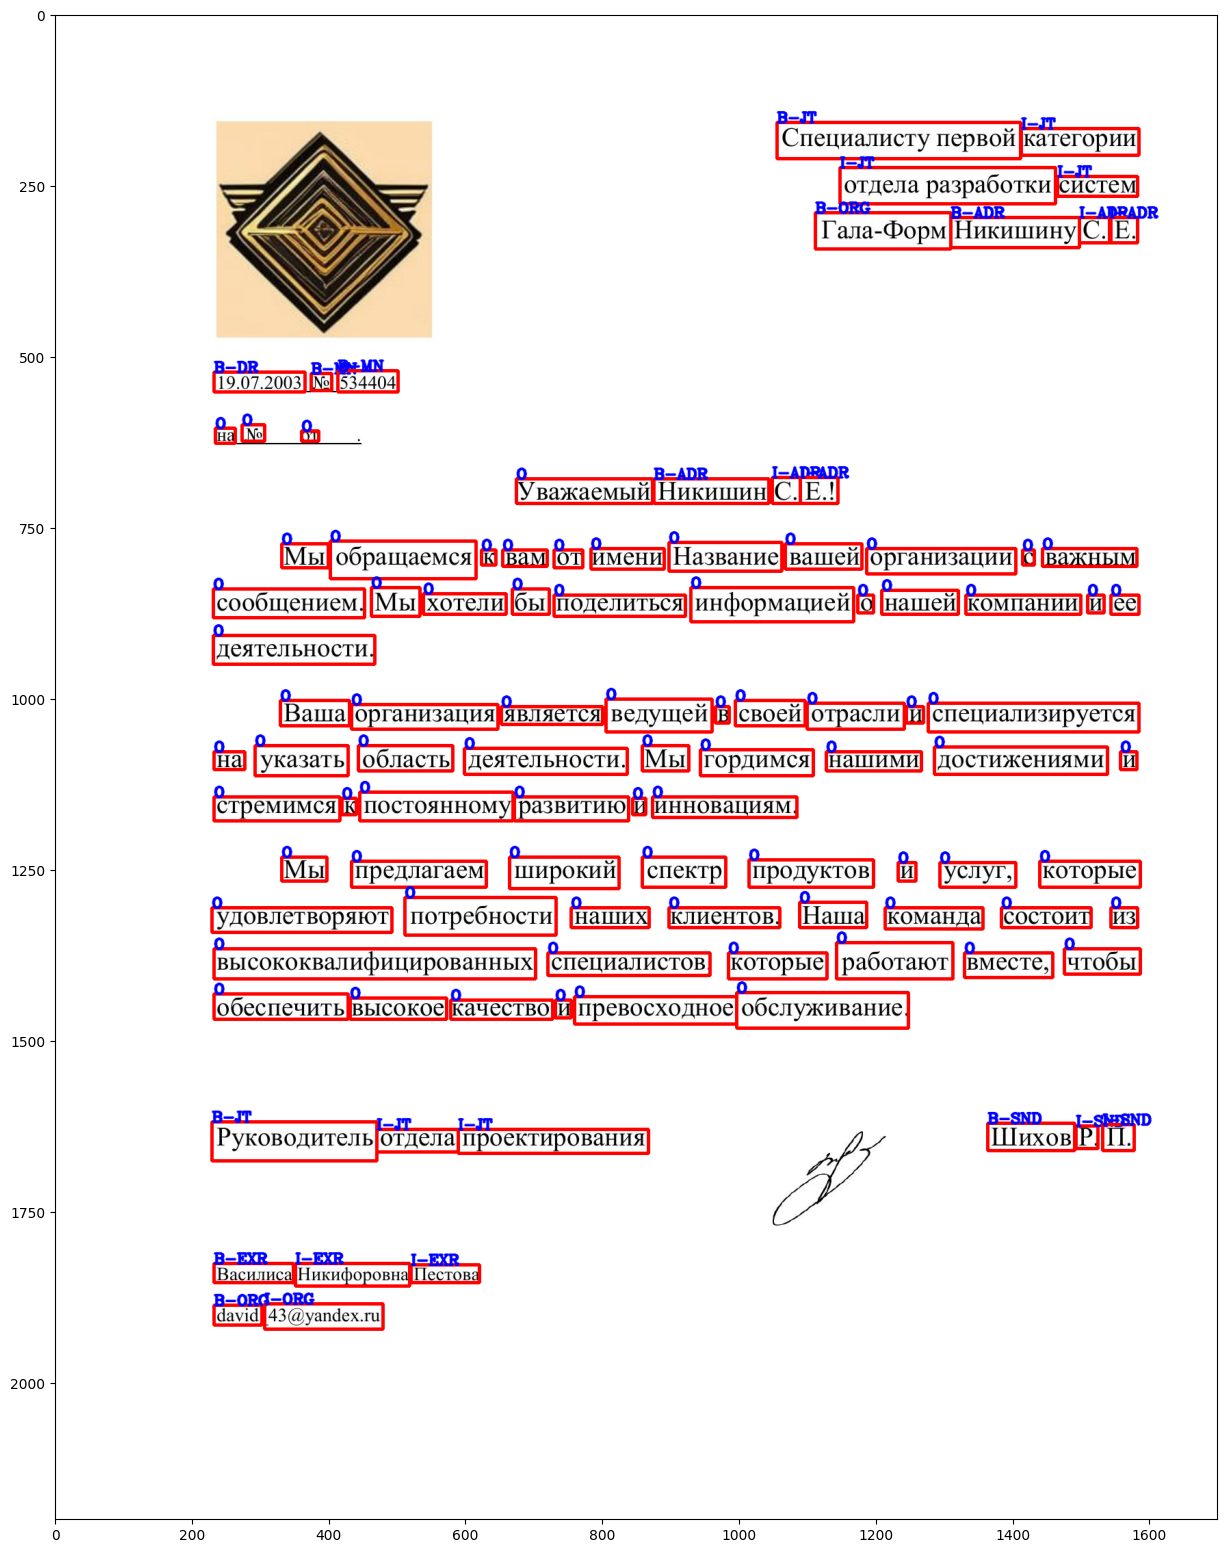

In [9]:
img_ = img.copy()
for (box, tag), word in zip(preds_boxes[1:], inputs_words):#zip(true_boxes, true_predictions): # ['<s>']+inputs_words
    start = (int(box[0]), int(box[1]))
    end = (int(box[2]), int(box[3]))
    cv2.rectangle(img_, start, end, (255, 0, 0), 3)
    cv2.putText(img_, tag, start, cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(15, 30))
plt.imshow(img_)

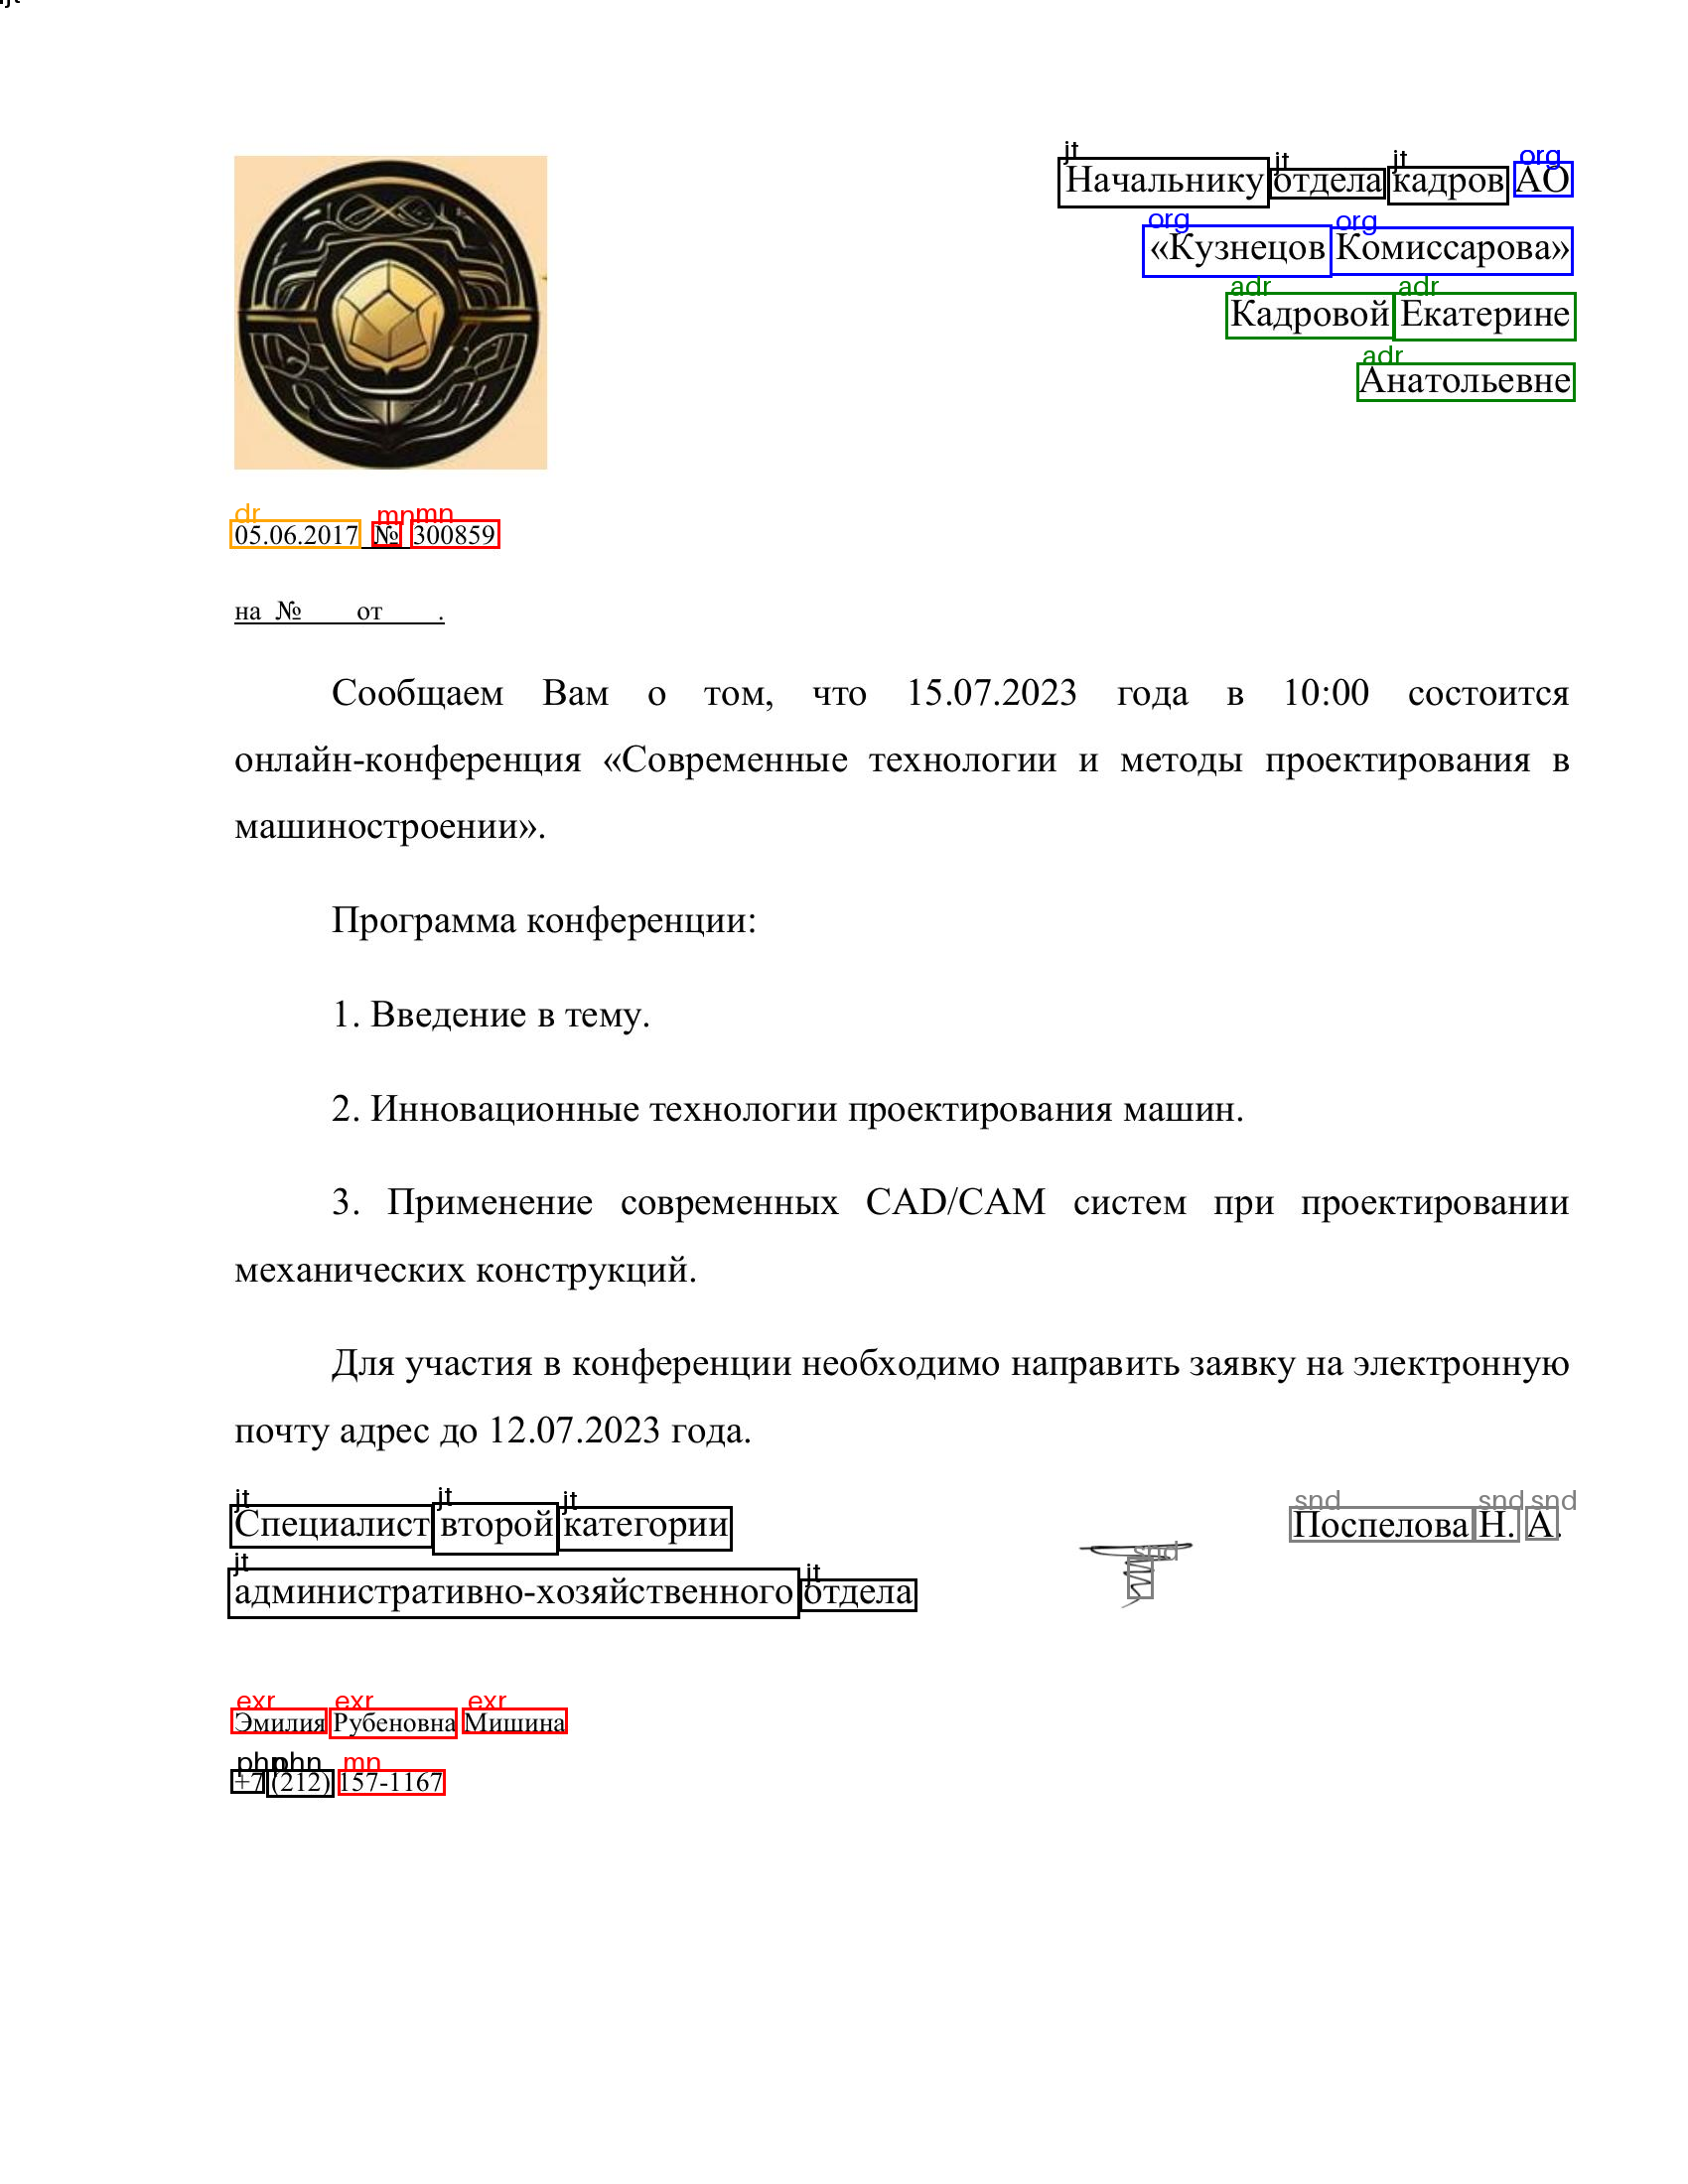

In [71]:
from PIL import ImageDraw, ImageFont
img_ = Image.fromarray(img.copy())
draw = ImageDraw.Draw(img_)
font = ImageFont.load_default(28)

def iob_to_label(label):
    label = label[2:]
    if not label:
      return 'other'
    return label

label2color = {'org':'blue', 'adr':'green', 'dr':'orange', 'other':'violet','mn':'red','mail':'blue','jt':'black','snd':'gray','exr':'red','phn':'black'}

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction).lower()
    if predicted_label != 'other':
        draw.rectangle(box, outline=label2color[predicted_label], width=3)
        draw.text((box[0]+5, box[1]-25), text=predicted_label, fill=label2color[predicted_label], font=font)

img_

# Doc segmentaion

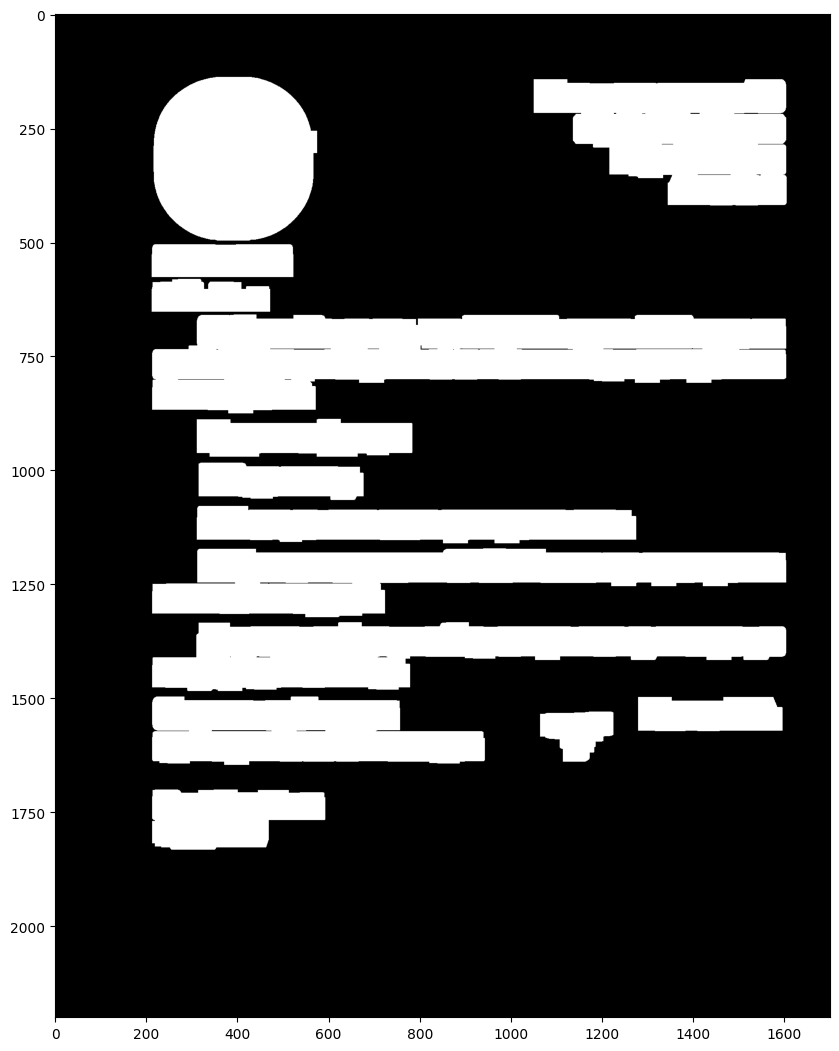

In [67]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((9, 9), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=6)
plt.figure(figsize=(10, 20))
plt.imshow(img_dilation, cmap='gray')

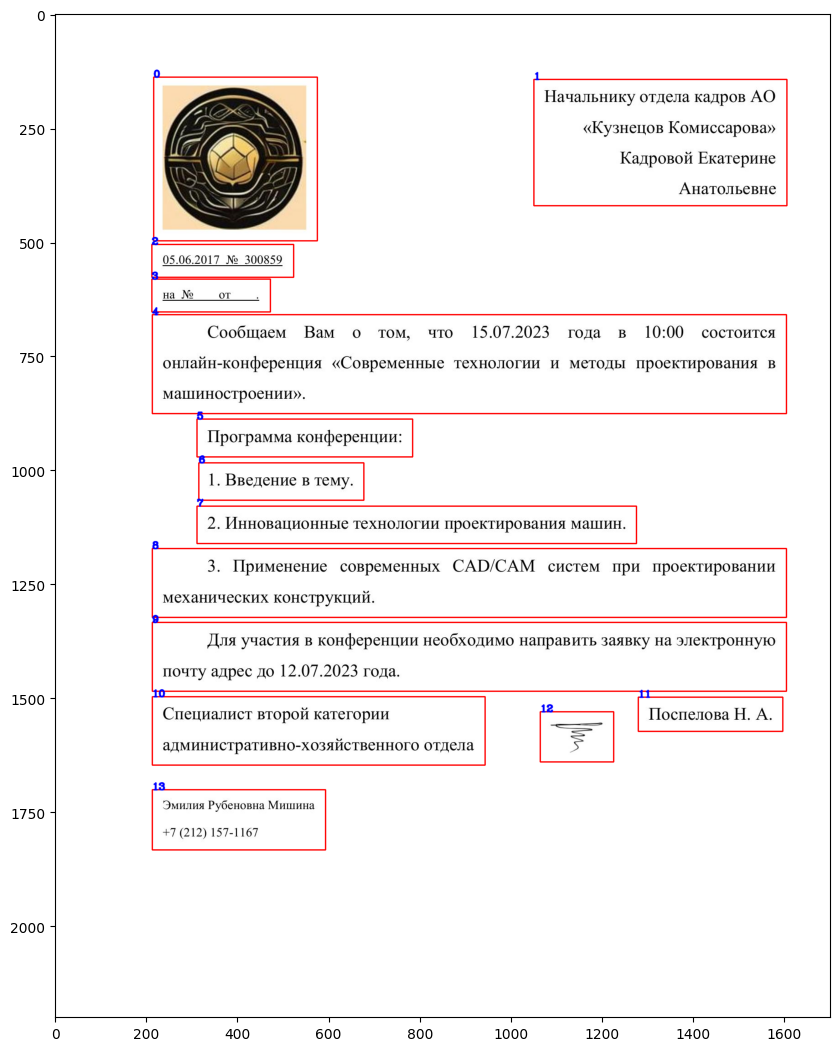

In [68]:
ctrs, hier = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda x: cv2.boundingRect(x)[1])

clusters = []
img_copy = img.copy()

for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    clusters.append((x, y, x+w, y+h))
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(img_copy, str(i), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(10, 20))
plt.imshow(img_copy)

In [36]:
def get_clusters(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((9, 9), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=6)

    ctrs, hier = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda x: cv2.boundingRect(x)[1])
    
    clusters = []
    
    for i, ctr in enumerate(sorted_ctrs):
        x, y, w, h = cv2.boundingRect(ctr)
        clusters.append((x, y, x+w, y+h))

    return clusters

In [39]:
clusters

[(1165, 143, 1604, 293),
 (213, 177, 570, 435),
 (212, 505, 523, 577),
 (212, 581, 472, 653),
 (213, 659, 1604, 876),
 (311, 888, 784, 971),
 (315, 984, 677, 1066),
 (311, 1079, 1275, 1161),
 (213, 1172, 1604, 1323),
 (213, 1334, 1603, 1485),
 (212, 1497, 972, 1647),
 (1350, 1498, 1595, 1573),
 (1002, 1535, 1281, 1645),
 (213, 1701, 637, 1828)]

In [37]:
get_clusters(img)

[(1165, 143, 1604, 293),
 (213, 177, 570, 435),
 (212, 505, 523, 577),
 (212, 581, 472, 653),
 (213, 659, 1604, 876),
 (311, 888, 784, 971),
 (315, 984, 677, 1066),
 (311, 1079, 1275, 1161),
 (213, 1172, 1604, 1323),
 (213, 1334, 1603, 1485),
 (212, 1497, 972, 1647),
 (1350, 1498, 1595, 1573),
 (1002, 1535, 1281, 1645),
 (213, 1701, 637, 1828)]

In [ ]:
# bbox = clusters
# for box check is in cluster
# take ners by cluster

In [69]:
def box_in(box, cluster, threshold=0.9):
    # box=(x0, y0, x1, y1), cluster=(x0, y0, x1, y1)
    S_intersect = max(min(box[2], cluster[2]) - max(box[0], cluster[0]), 0) * max(min(box[3], cluster[3]) - max(box[1], cluster[1]), 0)
    S_box = (box[2] - box[0]) * (box[3] - box[1])

    return (S_intersect / S_box) # >= threshold


entities_by_cls = defaultdict(list)
for (box, tag), word in zip(preds_boxes[1:], inputs_words):
    # print(box)
    # print([int(box_in(box, clusters[i])) for i in range(len(clusters))])
    cluster = int(np.argmax([int(box_in(box, clusters[i])) for i in range(len(clusters))]))
    entities_by_cls[cluster].append((word, tag))

entities_by_cls

defaultdict(list,
            {1: [('Начальнику', 'B-JT'),
              ('отдела', 'I-JT'),
              ('кадров', 'I-JT'),
              ('АО', 'B-ORG'),
              ('<Кузнецов', 'I-ORG'),
              ('Комиссаровах', 'I-ORG'),
              ('Кадровой', 'B-ADR'),
              ('Екатерине', 'I-ADR'),
              ('Анатольевне', 'I-ADR')],
             2: [('05.06.2017', 'B-DR'), (')', 'B-MN'), ('300859', 'B-MN')],
             3: [('На', 'O'), ('Л', 'O'), ('0Т', 'O')],
             4: [('Сообщаем', 'O'),
              ('Вам', 'O'),
              ('ТОм,', 'O'),
              ('ЧТО', 'O'),
              ('15.07.2023', 'O'),
              ('года', 'O'),
              ('В', 'O'),
              ('10.00', 'O'),
              ('состоится', 'O'),
              ('онлайн-конференция', 'O'),
              ('(Современные', 'O'),
              ('технологии', 'O'),
              ('И', 'O'),
              ('методы', 'O'),
              ('проектирования', 'O'),
              ('В', 'O'),
  

In [70]:
ners_dict = defaultdict(list)
entity = []
for cluster in sorted(entities_by_cls.keys()):
    for word, tag in entities_by_cls[cluster]:
        if tag[:2] == 'B-':
            if len(entity) > 0:
                only_ent = [ent for ent in entity if ent[1] != 'O']
                ners_dict[only_ent[0][1][2:]].append(' '.join([e[0] for e in only_ent]))
                entity = []
        entity.append((word, tag))

if len(entity) > 0:
    only_ent = [ent for ent in entity if ent[1] != 'O']
    ners_dict[only_ent[0][1][2:]].append(' '.join([e[0] for e in only_ent]))

ners_dict

defaultdict(list,
            {'JT': ['Начальнику отдела кадров',
              'Специалист второй категории административно-хозяйственного отдела'],
             'ORG': ['АО <Кузнецов Комиссаровах'],
             'ADR': ['Кадровой Екатерине Анатольевне'],
             'DR': ['05.06.2017'],
             'MN': [')', '300859', '157-1167'],
             'SND': ['Поспелова Н: А <'],
             'EXR': ['ЭМилия Рубсновна Мишина'],
             'PHN': ['+7', '(212)']})

In [ ]:
preds = true_predictions[:len(words)]
ners = []
ners_dict = defaultdict(list)
entity = []
for word, (box, tag) in zip(inputs_words, preds_boxes[1:]):
    if tag[:2] == 'B-':
        if len(entity) > 0:
            only_ent = [ent for ent in entity if ent[1] != 'O']
            ners.append(only_ent)
            ners_dict[only_ent[0][1][2:]].append(' '.join([e[0] for e in only_ent]))
            entity = []
    entity.append((word, tag))
if len(entity) > 0:
    only_ent = [ent for ent in entity if ent[1] != 'O']
    ners.append(only_ent)
    ners_dict[only_ent[0][1][2:]].append(' '.join([e[0] for e in only_ent]))
ners_dict

# Compute metrics

In [34]:
from ocr_processor import text_recognition

def box_in(box, cluster, threshold=0.9):
    # box=(x0, y0, x1, y1), cluster=(x0, y0, x1, y1)
    S_intersect = max(min(box[2], cluster[2]) - max(box[0], cluster[0]), 0) * max(min(box[3], cluster[3]) - max(box[1], cluster[1]), 0)
    S_box = (box[2] - box[0]) * (box[3] - box[1])

    return (S_intersect / S_box) # >= threshold
    
def get_clusters(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((9, 9), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=6)

    ctrs, hier = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda x: cv2.boundingRect(x)[1])
    
    clusters = []
    
    for i, ctr in enumerate(sorted_ctrs):
        x, y, w, h = cv2.boundingRect(ctr)
        clusters.append((x, y, x+w, y+h))

    return clusters
    
def get_pred(img):
    height, width, _ = img.shape
    inputs_words, inputs_boxes = text_recognition(img, reader)

    inputs_boxes = np.array(list(map(normalize_bbox, inputs_boxes, 
                                 [width]*len(inputs_boxes), [height]*len(inputs_boxes))))

    encoding = tokenizer(inputs_words, boxes=inputs_boxes, return_offsets_mapping=True, 
                         return_tensors="pt")

    device = "cuda" if torch.cuda.is_available() else "cpu"
    # print('Preprocessed')
    model.to(device)
    # split long text
    input_len = encoding.input_ids.shape[1]

    encoding.input_ids = pad(encoding.input_ids, 
                             pad=(0, 512 - (input_len % 512)), value=1.).reshape(-1, 512)
    encoding.attention_mask = pad(encoding.attention_mask, 
                                  pad=(0, 512 - (input_len % 512)), value=0.).reshape(-1, 512)
    encoding.bbox = pad(encoding.bbox, 
                                  pad=(0, 0, 0, 512 - (input_len % 512)), value=0.).reshape(-1, 512, 4)
    
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Resize((224, 224))])
    
    img_tensor = transform(img)
    normalized_image_tensor = torch.unsqueeze(img_tensor, 0)
    # print('Splitted')
    # get predictions
    with torch.no_grad():
        outputs = model(input_ids=encoding.input_ids.to(device),
                        attention_mask=encoding.attention_mask.to(device),
                        bbox=encoding.bbox.to(device),
                        image=normalized_image_tensor.to(device),
                       )
    predictions = outputs.logits.argmax(-1).reshape(-1).tolist()
    token_boxes = encoding.bbox.reshape(-1, 4).tolist()
    
    height, width, _ = img.shape
    
    is_subword = np.array(encoding.offset_mapping.tolist())[:,:,0].reshape(-1) != 0

    true_predictions = [model.config.id2label[pred] for idx, pred in enumerate(predictions[:len(is_subword)]) if not is_subword[idx]]
    true_boxes = [tuple(unnormalize_box(box, width, height)) for idx, box in enumerate(token_boxes[:len(is_subword)]) if not is_subword[idx]]
    preds_boxes = [(box, pred) for i, (pred, box) in enumerate(zip(true_predictions, true_boxes)) if box not in true_boxes[:i]]
    words = tokenizer.decode(encoding['input_ids'][0]).split(' ')

    # get_clusters
    clusters = get_clusters(img)

    entities_by_cls = defaultdict(list)
    for (box, tag), word in zip(preds_boxes[1:], inputs_words):
        # print(box)
        # print([int(box_in(box, clusters[i])) for i in range(len(clusters))])
        cluster = int(np.argmax([int(box_in(box, clusters[i])) for i in range(len(clusters))]))
        entities_by_cls[cluster].append((word, tag))
        
    # extract ners
    ners_dict = defaultdict(list)
    entity = []
    for cluster in sorted(entities_by_cls.keys()):
        for word, tag in entities_by_cls[cluster]:
            if tag[:2] == 'B-':
                if len(entity) > 0:
                    only_ent = [ent for ent in entity if ent[1] != 'O']
                    ners_dict[only_ent[0][1][2:]].append(' '.join([e[0] for e in only_ent]))
                    entity = []
            entity.append((word, tag))
    
    if len(entity) > 0:
        only_ent = [ent for ent in entity if ent[1] != 'O']
        ners_dict[only_ent[0][1][2:]].append(' '.join([e[0] for e in only_ent]))

    

    return [el for el in preds_boxes[1:] if el[1] != 'O']
    # return {
    #         'senderOrganization': ners_dict['ORG'][0] if ners_dict['ORG'] else 'UNK',
    #         'senderNumber': ners_dict['MN'][1] if ners_dict['MN'] else 'UNK',
    #         'senderDate': ners_dict['DR'][0] if ners_dict['DR'] else 'UNK',
    #         'addresseeName': ners_dict['ADR'][0] if ners_dict['ADR'] else 'UNK',
    #         'addresseeJobTitle': ners_dict['JT'][0] if ners_dict['JT'] else 'UNK',
    #         'senderName': ners_dict['SND'][0] if ners_dict['SND'] else 'UNK',
    #         'senderJobTitle': ners_dict['JT'][-1] if ners_dict['JT'] else 'UNK',
    #         'executorName': ners_dict['EXR'][0] if ners_dict['EXR'] else 'UNK',
    #         'executorPhone': ' '.join(ners_dict['PHN']) if ners_dict['PHN'] else 'UNK', 
    #         'executorEmail': ners_dict['MAIL'][0] if ners_dict['MAIL'] else 'UNK',
    #        }
    

In [35]:
get_pred(img)

/home/mkoltunov/projects/api_doc/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[((1055.7, 158.39999999999998, 1411.0, 211.20000000000002), 'B-JT'),
 ((1412.7, 167.2, 1584.4, 206.8), 'I-JT'),
 ((1147.5, 224.39999999999998, 1462.0, 277.2), 'I-JT'),
 ((1465.4, 237.6, 1582.7, 266.2), 'I-JT'),
 ((1111.8, 290.40000000000003, 1309.0, 343.2), 'B-ORG'),
 ((1309.0, 297.0, 1497.7, 341.0), 'B-ADR'),
 ((1497.7, 297.0, 1543.6000000000001, 334.4), 'I-ADR'),
 ((1541.9, 297.0, 1582.7, 334.4), 'I-ADR'),
 ((232.9, 523.6, 365.5, 552.2), 'B-DR'),
 ((374.0, 525.8, 404.59999999999997, 550.0), 'B-MN'),
 ((413.09999999999997, 521.4, 501.5, 552.2), 'B-MN'),
 ((875.5, 679.8, 1043.8, 715.0), 'B-ADR'),
 ((1048.9, 677.6, 1089.7, 715.0), 'I-ADR'),
 ((1089.7, 677.6, 1144.1000000000001, 715.0), 'I-ADR'),
 ((229.50000000000003, 1619.2, 470.90000000000003, 1676.4), 'B-JT'),
 ((470.90000000000003, 1630.2, 589.9, 1663.2), 'I-JT'),
 ((589.9, 1630.2, 867.0, 1665.4), 'I-JT'),
 ((1363.4, 1621.3999999999999, 1490.9, 1661.0), 'B-SND'),
 ((1492.6, 1625.8, 1524.9, 1658.8), 'I-SND'),
 ((1531.7, 1623.6, 1577.

In [47]:
def iou(box_true, box_pred):
    # print(box_true, box_pred)
    S_intersect = max(min(box_true[2], box_pred[2]) - max(box_true[0], box_pred[0]), 0) \
                * max(min(box_true[3], box_pred[3]) - max(box_true[1], box_pred[1]), 0)
    S_union = (box_true[3] - box_true[1]) * (box_true[2] - box_true[0]) \
            + (box_pred[3] - box_pred[1]) * (box_pred[2] - box_pred[0]) - S_intersect
    
    return S_intersect / S_union if S_union > 0 else 0.0

box = list(preds_boxes[1][0])
box[0] += 10
box[1] -= 10
iou(box, preds_boxes[1][0])

0.8207793330344072

In [65]:
import json
import os

y_true = []
y_pred = []

for filename in range(50):
    with open(os.path.join('json', f'{filename}.json'), 'r') as f:
        data_true = json.load(f)
    boxes_true = defaultdict(list)
    for box, tag in zip(data_true['boxes'], data_true['ner_tags']):
        if tag != 'O':
            boxes_true[tag[2:]].append([coord for axis in box for coord in axis])
    
    data_pred = get_pred(cv2.cvtColor(cv2.imread(f'jpg/{filename}.jpg'), cv2.COLOR_BGR2RGB))
    boxes_pred = defaultdict(list)
    
    for box, tag in data_pred:
        boxes_pred[tag[2:]].append(box)

    y_true.append(boxes_true)
    y_pred.append(boxes_pred)

/home/mkoltunov/projects/api_doc/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/home/mkoltunov/projects/api_doc/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

ZeroDivisionError: float division by zero

In [55]:
for sample in y_true:
    sample['DR'] = sample['DS']
for sample in y_pred:
    sample['DS'] = sample['DR']

In [63]:
f1_per_ner = defaultdict(list)
for i in range(len(y_pred)):
    for ner in y_pred[i].keys():
        tp = 0
        fp = 0
        fn = 0
        for box in y_pred[i][ner]:
            if ner in y_true[i].keys():
                ious = np.array([iou(box, b) for b in y_true[i][ner]]) > 0.5
                if np.any(ious):
                    tp += 1
                else:
                    fp += 1
            else:
                fp += 1
                
        for box in y_true[i][ner]:
            if ner in y_pred[i].keys():
                ious = np.array([iou(box, b) for b in y_pred[i][ner]]) > 0.5
                if np.any(ious):
                    tp += 1
                else:
                    fp += 1
            else:
                fn += 1
        pr = tp / (tp + fp) if (tp + fp) > 0 else 0.
        r = tp / (tp + fn) if (tp + fn) > 0 else 0.
        f1 = 2*pr*r / (pr + r) if pr + r > 0 else 0.
        print(f'Sample {i}, NER={ner}, f1=', f1)
        f1_per_ner[ner].append(f1)
    

Sample 0, NER=JT, f1= 0.9655172413793104
Sample 0, NER=ORG, f1= 0.5714285714285715
Sample 0, NER=ADR, f1= 1.0
Sample 0, NER=DR, f1= 0.0
Sample 0, NER=MN, f1= 0.8
Sample 0, NER=SND, f1= 0.888888888888889
Sample 0, NER=EXR, f1= 1.0
Sample 1, NER=JT, f1= 1.0
Sample 1, NER=ORG, f1= 0.6666666666666666
Sample 1, NER=ADR, f1= 1.0
Sample 1, NER=DR, f1= 0.0
Sample 1, NER=MN, f1= 0.6666666666666666
Sample 1, NER=SND, f1= 1.0
Sample 1, NER=EXR, f1= 1.0
Sample 1, NER=PHN, f1= 0.0
Sample 2, NER=JT, f1= 1.0
Sample 2, NER=ORG, f1= 1.0
Sample 2, NER=ADR, f1= 1.0
Sample 2, NER=DR, f1= 0.0
Sample 2, NER=MN, f1= 0.6666666666666666
Sample 2, NER=SND, f1= 0.923076923076923
Sample 2, NER=EXR, f1= 1.0
Sample 2, NER=PHN, f1= 0.0
Sample 3, NER=JT, f1= 1.0
Sample 3, NER=ORG, f1= 1.0
Sample 3, NER=ADR, f1= 0.8
Sample 3, NER=DR, f1= 0.0
Sample 3, NER=MN, f1= 0.8
Sample 3, NER=SND, f1= 0.8
Sample 3, NER=EXR, f1= 1.0
Sample 3, NER=MAIL, f1= 1.0
Sample 4, NER=JT, f1= 1.0
Sample 4, NER=ORG, f1= 0.923076923076923
Samp

In [64]:
for ner in f1_per_ner:
    print(f'{ner}:', np.mean(f1_per_ner[ner]))

JT: 0.9519102362882902
ORG: 0.9012867474405936
ADR: 0.9653846153846154
DR: 0.0
MN: 0.7413919413919415
SND: 0.9359631821170283
EXR: 0.9846153846153847
PHN: 0.2
MAIL: 1.0


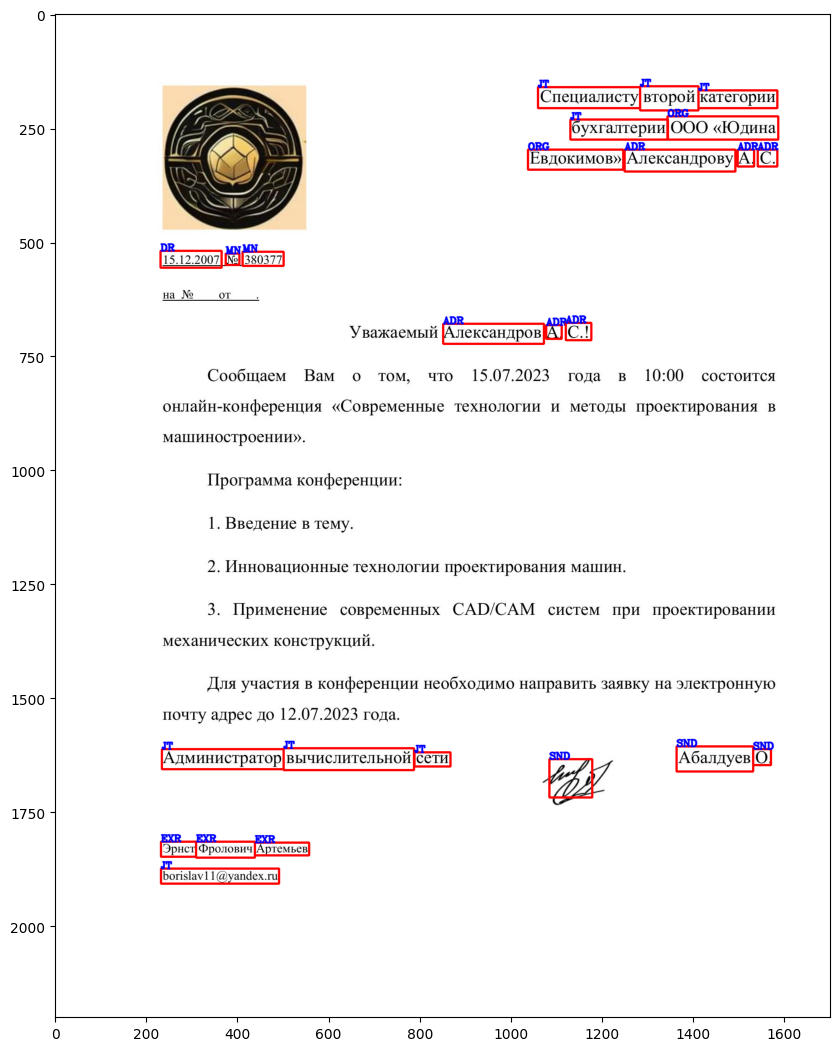

In [62]:
n = 0
sample = y_pred[n]
img_sample = cv2.cvtColor(cv2.imread(f'jpg/{n}.jpg'), cv2.COLOR_BGR2RGB)

for ner in sample:
    for box in sample[ner]:
        cv2.rectangle(img_sample, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 0), 3)
        cv2.putText(img_sample, ner, (int(box[0]), int(box[1])), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(10, 20))
plt.imshow(img_sample)